In [ ]:
!pip install setuptools==66
!pip install d2l==1.0.0-beta0

import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from matplotlib import pyplot as plt

import torch
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F

!pip install ptflops
import ptflops
from ptflops import get_model_complexity_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IN CLASS EXAMPLE FOR GRU**

In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)

In [ ]:
class GRU(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens)

'it has of the propent of t'

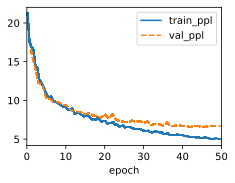

In [ ]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=4)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

**Q 1.1 Adjusting the num_hiddens=6, num_layers=4, dropout=1**

In [ ]:
class adjGRU(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens)


'it has the the the the the'

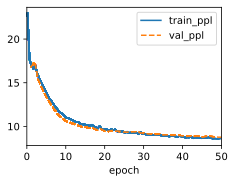

In [ ]:
gru = adjGRU(num_inputs=len(data.vocab), num_hiddens=6, num_layers=4, dropout=1)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=3)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

**Adjusting num_hiddens=64, num_layers=2, dropout=0**

'it has is the time travell'

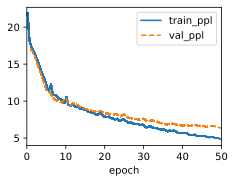

In [ ]:
gru = adjGRU(num_inputs=len(data.vocab), num_hiddens=64, num_layers=2, dropout=0)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=3)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

**Q 1.2 use the LSTM IN CLASS EXAMPLE**

In [ ]:
class LSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)


'it has of the paster the t'

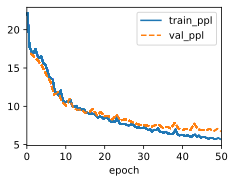

In [ ]:
lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)
model.predict('it has', 20, data.vocab, d2l.try_gpu())

**Adjusting LSTM num_hiddens=6, num_layers=4, dropout=1)**

In [ ]:
class adjLSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)

'it has the the the the the'

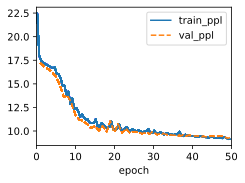

In [ ]:
lstm = adjLSTM(num_inputs=len(data.vocab), num_hiddens=6, num_layers=4, dropout=1)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)
model.predict('it has', 20, data.vocab, d2l.try_gpu())

**Adjusting LSTM num_hiddens=64, num_layers=2, dropout=0**

'it has a can and the time '

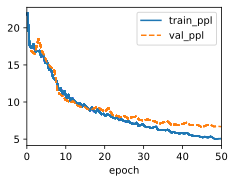

In [ ]:
lstm = adjLSTM(num_inputs=len(data.vocab), num_hiddens=64, num_layers=2, dropout=0)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)
model.predict('it has', 20, data.vocab, d2l.try_gpu())

**Q 1.3 IN CLASS RNN MODEL**

In [ ]:
class RNNLMScratch(d2l.Classifier): 
    """The RNN-based language model implemented from scratch."""
    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)

In [ ]:
class RNN(d2l.Module):
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)
    
    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

'it hasi oo   o  s   s   s '

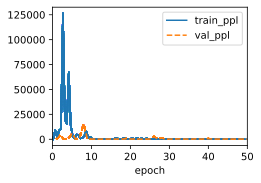

In [ ]:
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=64)
model = d2l.RNNLM(rnn, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

**Adjusting RNN num_hiddens=6, num_layers=4, dropout=1**

In [ ]:
class adjRNN(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)
    
    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

'it has the the the the the'

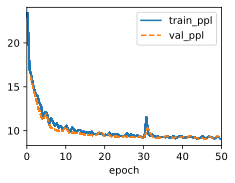

In [ ]:
rnn = adjRNN(num_inputs=len(data.vocab), num_layers=4, num_hiddens=6, dropout=1)
model = d2l.RNNLM(rnn, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

**Adjusting RNN num_hiddens=64, num_layers=2, dropout=0**

'it has e e e e e e e e e e'

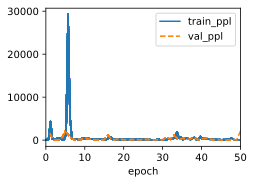

In [ ]:
rnn = adjRNN(num_inputs=len(data.vocab), num_layers=2, num_hiddens=64, dropout=0)
model = d2l.RNNLM(rnn, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

**Q 2 Building the model by replacing the GRU with an LSTM**

**--REPLACING GRU WITH AN LSTM IS SAME AS Q 1.2 
TAKING Q 1.2 WE GET**



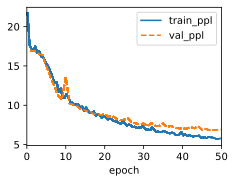

In [ ]:
class LSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)

lstm = LSTM(num_inputs=len(data.vocab), num_hiddens=32)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)

**Q 2.2 Comparing runtime for training and inference, computational and mode size complexities, and the output strings for nn.LSTM and rnn.GRU implementations** 

In [ ]:
import time

# Define input sequence and hyperparameters
input_seq_len = 50
hidden_size = 64
batch_size = 16
num_layers = 2

# Define LSTM model
lstm_model = torch.nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers)
# Define GRU model
gru_model = torch.nn.GRU(input_size=1, hidden_size=hidden_size, num_layers=num_layers)

# Generate random input data
input_data = torch.randn(input_seq_len, batch_size, 1)

# Train and time LSTM model
start_time = time.time()
lstm_out, _ = lstm_model(input_data)
loss = torch.mean(lstm_out)
loss.backward()
end_time = time.time()
lstm_train_time = end_time - start_time

# Inference and time LSTM model
start_time = time.time()
lstm_out, _ = lstm_model(input_data)
end_time = time.time()
lstm_inference_time = end_time - start_time

# Train and time GRU model
start_time = time.time()
gru_out, _ = gru_model(input_data)
loss = torch.mean(gru_out)
loss.backward()
end_time = time.time()
gru_train_time = end_time - start_time

# Inference and time GRU model
start_time = time.time()
gru_out, _ = gru_model(input_data)
end_time = time.time()
gru_inference_time = end_time - start_time

# Compute model sizes
lstm_model_size = sum(p.numel() for p in lstm_model.parameters())
gru_model_size = sum(p.numel() for p in gru_model.parameters())

# Compare output strings
lstm_output_string = str(lstm_out.detach().numpy())
gru_output_string = str(gru_out.detach().numpy())

# Print results
print("LSTM train time:", lstm_train_time)
print("LSTM inference time:", lstm_inference_time)
print("GRU train time:", gru_train_time)
print("GRU inference time:", gru_inference_time)
print("LSTM model size:", lstm_model_size)
print("GRU model size:", gru_model_size)
print("LSTM output string:", lstm_output_string)
print("GRU output string:", gru_output_string)


LSTM train time: 0.027175188064575195
LSTM inference time: 0.008471250534057617
GRU train time: 0.026217222213745117
GRU inference time: 0.008354425430297852
LSTM model size: 50432
GRU model size: 37824
LSTM output string: [[[ 0.02745061  0.01364699  0.00063653 ...  0.01839582 -0.03318226
    0.05617772]
  [ 0.03060824  0.02012632 -0.00080584 ...  0.02199532 -0.03600009
    0.05399487]
  [ 0.03392741  0.02608442 -0.00282958 ...  0.02573325 -0.03784123
    0.05246111]
  ...
  [ 0.0294273   0.01781203 -0.00019655 ...  0.0206544  -0.0350836
    0.05470236]
  [ 0.03228224  0.02322083 -0.00177787 ...  0.02388515 -0.03705404
    0.05315229]
  [ 0.03129701  0.02142405 -0.00119199 ...  0.02277431 -0.03646676
    0.05362819]]

 [[ 0.04556102  0.03655087  0.00076001 ...  0.03633031 -0.05792765
    0.08370158]
  [ 0.05368189  0.05128888 -0.00485373 ...  0.04714719 -0.06158769
    0.07973167]
  [ 0.04852479  0.04238683 -0.00253219 ...  0.04189958 -0.0613436
    0.08214203]
  ...
  [ 0.04284903  0.

**Q 2.3 Adjusting the hyperparameters (fully connected network, number of hidden layers, and the number of hidden states) and comparing your results**

**Adjusting hyperparameters of GRU with lr= 1, num_hiddens= 12, num_layer= 8, dropout=0**

In [169]:
class adjGRU(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens)

'it has the the the the the'

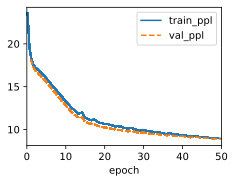

In [170]:
gru = adjGRU(num_inputs=len(data.vocab), num_hiddens=12, num_layers=8, dropout=0)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=50, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

In [171]:
class adjLSTM(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.LSTM(num_inputs, num_hiddens)

    def forward(self, inputs, H_C=None):
        return self.rnn(inputs, H_C)

'it has the the the the the'

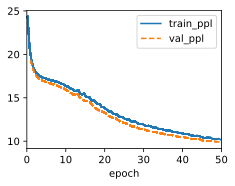

In [172]:
lstm = adjLSTM(num_inputs=len(data.vocab), num_hiddens=12, num_layers=8, dropout=0)
model = d2l.RNNLM(lstm, vocab_size=len(data.vocab), lr=1)
trainer.fit(model, data)
model.predict('it has', 20, data.vocab, d2l.try_gpu())

In [173]:
class RNN(d2l.Module):
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)
    
    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

In [174]:
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=12, num_layers=8, dropout=0)
model = d2l.RNNLM(rnn, vocab_size=len(data.vocab), lr=4)
trainer.fit(model, data)
model.predict("it has", 20, data.vocab, d2l.try_gpu())

TypeError: ignored